<a href="https://colab.research.google.com/github/nikhil-nikss/DeepLearning/blob/main/Twitter_Sentiment_Analysis_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter Sentiment Analysis using nltk library

In [32]:
# importing libraries

import nltk 
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
# downloading the dataset

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
# loading positive and negative tweets

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [10]:
# print the number of tweets in each section

print('Number of positive tweets',len(all_positive_tweets))
print('Number of negative tweets',len(all_negative_tweets))

print('type of all positive tweets',type(all_positive_tweets))
print('type of each tweets',type(all_negative_tweets[0]))

Number of positive tweets 5000
Number of negative tweets 5000
type of all positive tweets <class 'list'>
type of each tweets <class 'str'>


([<matplotlib.patches.Wedge at 0x7ff43808d450>,
 [Text(-1.1, 1.3471114790620887e-16, 'Positive'),
  Text(1.1, -2.6942229581241775e-16, 'Negative')],
 [Text(-0.6, 7.347880794884119e-17, '50.0f'),
  Text(0.6, -1.4695761589768238e-16, '50.0f')])

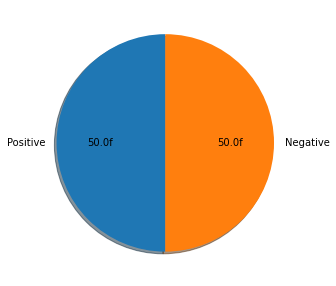

In [13]:
# visualizing the data

fig = plt.figure(figsize=(5,5))

labels = 'Positive','Negative'

sizes = [len(all_positive_tweets),len(all_negative_tweets)]

plt.pie(sizes,labels=labels,autopct='%1.1ff',shadow=True,startangle=90)

In [20]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

We'd appreciate your support Our @GuiseGemma for the Rising star award @WATC_Updates ~ vote for her here! Tks :) https://t.co/ZcIAClQxhE
I want Jack's follow so bad, but I don't want to be annoying by spamming him :( sooo @jackgilinsky follow me please? ☺💜


For NLP, the preprocessing steps are comprised of the following tasks:

<br>Tokenizing the string
<br>Lowercasing
<br>Removing stop words and punctuation
<br>Stemming

In [23]:
# preprocess data

tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [24]:
# download stopwords library

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
# importing libraries for preprocessing

import re # for regular expression
import string # for string operations
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [31]:
# removing hyperlinks and twitter marks and style

print('\033[92m' + tweet)
print('\033[94m')

# removing RT 

tweet2 = re.sub(r'^RT[\s]+','',tweet)
print(tweet2)

# removing hyperlinks

tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet2)
print(tweet2)

# removing # sign from tweet

tweet2 = re.sub(r'#','',tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [38]:
# Tokenizing the string

print()
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case = True,strip_handles = True,reduce_len=True)

tweet_token = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_token)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['My', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'Friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'Friday', 'off', '…']


In [42]:
# remove stopwords and punctuatons

stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [48]:
# tokenized tweets cleanup

print('\033[92m')
print(tweet_token)
print('\033[94m')

tweets_clean = []

for word in tweet_token:
  if(word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print('Removed stopwords and punctuations')
print(tweets_clean)


['My', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'Friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'Friday', 'off', '…']

Removed stopwords and punctuations
['My', 'beautiful', 'sunflowers', 'sunny', 'Friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'Friday', '…']


In [49]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['My', 'beautiful', 'sunflowers', 'sunny', 'Friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'Friday', '…']

stemmed words:
['My', 'beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [55]:
!pip install utils

In [56]:
import utils
from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result

ImportError: ignored